In [1]:
##Some code to run at the beginning of the file, to be able to show images in the notebook
##Don't worry about this cell

#Print the plots in this screen
%matplotlib inline 

#Be able to plot images saved in the hard drive
from IPython.display import Image 

#Make the notebook wider
from IPython.core.display import display, HTML 
display(HTML("<style>.container { width:90% !important; }</style>"))

#Usual imports
import pandas as pd
import numpy as np
import seaborn as sns
import pylab as plt

# PYTHON: Variables and code
Python uses variables and code.


##  Variables
Variables tell the computer to save something (a number, a string, a spreadsheet) with a name.
For instance, if you write *variable_name = 3*, the computer knows that *variable_name* is 3.
- **Data types**: Numbers, strings and others
- **Data structures**: 
    - Lists, tables... (full of data types)



## 2.3 Code
- Instructions to modify variables
- **2.3.1 Can be organized in functions**
- Variables can be seen for all or part of the code: **Scope of variables**    
- **2.3.2 For loops**: Repeat a similar statement many times
- **2.3.4 Control-flow**: if-else statements, try-except statement and for-loops
- **2.3.5 Try-except**: error catching



## 2.3 Code: Operations, functions, control flow and loops
- We have the data in data structures, composed of several data types.
- We need code to edit everything

## 2.3.1 Functions
- A fragment of code that takes some standard input (arguments) and returns some standard output.
- Example: The mean function. Gets a list of numbers as input, gives the mean as output. Gives an error if you try to calculate the mean of some strings.
- We have already seen many functions. Add, mean...

In [2]:
## Our own functions
def mean_ours(list_numbers): #list_numbers is the arguments
    """
    This is called the docstring, it is a comment describing the function. In this case the function calculates the mean of a list of numbers.
    
    input 
        list_numbers: a list of numbers
    
    output: the mean of the input   
    """
    #what gives back
    return sum(list_numbers)/len(list_numbers)

##INDENTATION!!
##Two points after the "def"

In [3]:
mean_ours?

In [4]:
aList = [2,3,4]
mean_ours(aList) #this is how you call the funciton

3.0

In [5]:
mean_aList = mean_ours(aList) #this is how you call the funciton
mean_aList

3.0

**How the arguments of a function work**

If there are many arguments, the first value that you pass is matched to the first argument of the function, the second to the second, etc.

For instance, these are the arguments of the function pd.read_csv()

    `pd.read_csv(filepath_or_buffer, sep=',', delimiter=None, header='infer',...)`

Writing

    `pd.read_csv("data/ams_green.csv", "\t", None, 0)`

matches 

    `filepath_or_buffer TO "data/ams_green.csv",
    sep TO "\t",
    delimiter TO None, 
    header TO 0`

You can also pass the arguments by name. For instance

    `pd.read_csv("data/ams_green.csv",header= 0, sep="\t",delimiter=None)`

is identical to the line before. In this case the values you pass do not have to be in the same order as the arguments.
    



## When to use functions
- When you need to do the same steps many times
- To organize the code into coherent parts (e.g., merging data, calculating regressions, visualization)

## 2.3.2 Scope: Global vs local variables
- Variables inside functions are only seen by that function
- Variables outside functions are seen and can be modified by all functions (dangerous)

In [6]:
def f(): 
    local_var1 = 2
    local_var2 = 3
    local_var = local_var1*local_var2
    print(local_var)

#Call the function
f()

6


** Variables created inside functions are only seen within the function**

In [7]:
def f(): 
    local_var1 = 2
    local_var2 = 2
    local_var = local_var1*local_var2

#Call the function
f()
#We haven't created local_var
print(local_var)

NameError: name 'local_var' is not defined

In [8]:
def f(): 
    local_var1 = 2
    local_var2 = 2
    local_var = local_var1*local_var2
    return local_var

#Call the function
gvar = f()
#Now we have the value of local_var
print(gvar)

4


** Variables created outside functions are seen by all the code (be careful!)**

In [10]:
local_var = "python"

def f(): 
    print(local_var) #this can read the variable outside, but NOT CHANGE IT (except .pop() and .append())
    #it's okay for functions not to return anything, by default they return None
    
    
#Call the function
f()
#We can also see it from outside the function
print(local_var)

python
python


## 2.3.2 For-Loops
- Iterate over a list (or an array, or a set, or the keys of a dictionary..), like this:

`for element in [1,2,3,4,5]:
    print(element)
`

The computer:
- Reads the first line (`for element in [1,2,3,4,5]`) and realizes it is a for loop
- It then assigns element = 1 (the first element in the list) and does whatever it is inside the for loop (`print(element)`)
- Then it assigns element = 2 (the second element) and does whatever it is inside the loop
- It continues like this until the last element
- When there are no more elements in the list it exits the loop and continues reading the code behind the loop (if any)


You can write anything instead of element (for i in range(10) for instance)


The indentation and the colon are important, you get SyntaxError without them.


In [11]:
for x in ["Adam","Utercht"]:
    print(x)

Adam
Utercht


In [12]:
i = 0
for x in ["Adam","Utercht"]:
    print(i,x)
    i = i + 1 #or you can write "i += 1" and it means "i = i + 1"

0 Adam
1 Utercht


In [13]:
#Imagine we want to find what some articles are talking about, we could do it like this,
#but it's unfeasible when you have more than a dozen articles

list_articles = ["article 1: blah python",
                 "article 2: blah Trump",
                 "article 3: blah Trump",
                 "article 4: blah Trump"]#many article

print("python" in list_articles[0])
print("python" in list_articles[1])
print("python" in list_articles[2])
print("python" in list_articles[3])
#...

True
False
False
False


In [14]:
#but we can use for loops 
for article in list_articles:
    print("python" in article)

True
False
False
False


In [19]:
#This is what pandas does, but much faster because it's vectorized 
#sample data
df = pd.read_csv("data/test_event.csv",sep="\t")
df["cont_20_events"] = df["events"].str.contains("20 events")

df


,events,year,cont_20_events
0,20 events,2005,True
1,120 events,2010,True
2,2 events,2015,False
3,1000 events,2020,False


In [20]:
list_events = []
for event in df["events"]:
    list_events.append("20 events" in event)
    
df["cont_20_events_for"] = list_events
df

,events,year,cont_20_events,cont_20_events_for
0,20 events,2005,True,True
1,120 events,2010,True,True
2,2 events,2015,False,False
3,1000 events,2020,False,False


**what if we want to stop a loop?**
Then we can use `break`

In [15]:
i = 0 
for article in list_articles:
    if i == 2: 
        break
    print(i, "python" in article)
    
    i = i + 1 #i += 1



0 True
1 False


**you can iterate over rows in a dataframe**
I find it useful to annotate plots

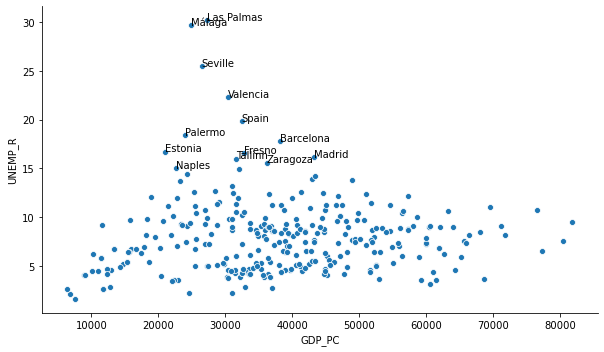

In [16]:
df = pd.read_csv("data/world_bank_data.tsv",sep="\t")
df = df.loc[df["Year"]==2010]

#Create plot
sns.relplot(x="GDP_PC", y="UNEMP_R", data=df, kind="scatter", aspect=1.7)

#Iterate and annotate
for i,row in df.iterrows():
    if row["UNEMP_R"] > 15:
        plt.annotate(row["Metropolitan areas"],(row["GDP_PC"], row["UNEMP_R"]))

## 2.3.4 Control flow = if-else statements
- Controls the flow. If something happens, then do something. Else, do another thing. Like this

`
    
    article = "Trump is going to make America great"
    
    if "python" in article:
        print("python",article)
    elif "climate change" in article:
        print("climate change",article)
    else:
        print("no python", article)
`

The computer:
- Reads the first line (`if "python" in article`) and realizes it is an if-else statement
- It then checks if `python" in article` is True. 
    - If it is True, it reads whatever is inside the if statement (in this case `print("python",article)`) and goes to the end of all the if-elif-else. 
    - If it is False, it goes to the elif (else if), and checks if `elif "climate change" in article` is True.
        - If it is True, it reads whatever it is inside and goes to the end
        - If it is False, it goes to the else and prints whatever it is inside
       
You only need the `if`, the `elif` and `else` are optional. For instance without `else` the code above wouldn't print anything. 

You can have as many `elif`s as you want.


The indentation and the colon are important, you get SyntaxError without them.

**Let's write code that tells us if an article is about python or Trump**

In [ ]:
article = "article 2: blah Trump python"
if "python" in article:
    print("Article refering to Python")
    
if "Trump" in article:
    print("Article refering to Trump")


## 2.3 Code: Let's combine all we learned so far
**Write a function that prints if an article is related to "python" or "Trump", and run it for many cases**

**We can wrap it into a function**

In [ ]:
def python_or_trump(article):
    """
    prints if an article is related to python or trump
    
    input
    article: string with words
    
    """
    
    if "python" in article:
        return "Article refering to Python"
    elif "Trump" in article:
        return "Article refering to Trump"
    else:
        return "Article not refering to Python or Trump"
    

In [ ]:
article = "article 2: blah Trump"
print(article)
#this is how you call the function
python_or_trump(article)

In [ ]:
#stops when python is found, never check for trump
article = "article 2: blah Trump python"
print(article)
python_or_trump(article)

In [ ]:
article = "article 2: blah blah"
print(article)
python_or_trump(article)

**Now we do it for many articles**

In [ ]:
list_articles = ["article 1: blah python",
                 "article 2: blah Trump",
                 "article 3: blah Trump",
                 "article 4: blah Trump"]#many articles

for article in list_articles:
    print(python_or_trump(article))

In [ ]:
#If we had them in a dataframe
df["python_trump"] = df["variable_with_articles"].apply(python_or_trump)

**what if we want a loop but we don't know when we need to stop?**

Then we can use the while loop:

`
while condition:
    do something
    update condition #otherwise the loop is infinitei
`

However in python is not too common.


## 2.3.5 Try - except
Exception handling. Sometimes the code tries something that can result in an error, and you want to *catch* the error and react to it.


In [ ]:
#For instance this fails, because we don't have more than 2 friends
#Dictionary
cities2countries = {"Amsterdam": "NL", "Madrid": "ES", "Brussels": "BE"}


In [ ]:
print(cities2countries["Brussels"])

In [ ]:
#example how to fix it
#the indents are important, as well as the colons
try:
    print(cities2countries["Brussels"])
except KeyError:
    print("I have no idea where Brussels is")


In [ ]:
bruss_country = cities2countries.get("Brussels")
if bruss_country is None: #f5 == None 
    print("I have no idea where Brussels is")
    

## Extra. Writing and reading from disk
**You can also write files line by line**

"r": read
"w": write
"w+": write and if doesn't exist, create it

In [ ]:
with open("data/file_to_write.csv","w+") as f:
    f.write("I'm line number {}".format(0))
    f.write("I'm line number {}".format(1))
    f.write("I'm line number {}".format(2))
    f.write("I'm line number {}".format(3))
    f.write("I'm line number {}".format(4))


**But remember to add a "return character" (\n)**

In [ ]:
with open("data/file_to_write.csv","w+") as f:
    f.write("I'm line number {}\n".format(0))
    f.write("I'm line number {}\n".format(1))
    f.write("I'm line number {}\n".format(2))
    f.write("I'm line number {}\n".format(3))
    f.write("I'm line number {}\n".format(4))


**How to read a fiel**

We won't be reading the files like this too often, but sometimes you need to read them line by line (instead of loading all the files like we do with pandas)



- Read it line by line

In [ ]:
with open("data/file_to_write.csv") as f:
    #way 3
    for line in f:
        print(line)
   

**you can delete the "\n" at the end of the string with .strip()**

In [ ]:
with open("data/file_to_write.csv") as f:
    #way 3
    for line in f:
        print(line.strip())
   

---

In [ ]:
#You can see your environment like this
!conda env export

In [ ]:
#And export it to a file
!conda env export > environment.yml